Importing the necessary libraries to perform analysis

- numpy and pandas are used for data manipulation
- matplotlib and seaborn are used for data visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

reading the csv file

In [2]:
df = pd.read_csv("D://ba_reviews.csv")

some of the data analysis steps involved are

- Shape indicates the no of rows and columns
- head displays the top 5 rows of the dataset.
- tail displays the bottom 5 rows of the dataset.
- describes gives the statistical summary of the dataset.
- info displays the information like how many values are present, if there is non null values and also the datatype of the column.

In [3]:
df.head()

header               author        date  \
0      service was mediocre at best          Gary Storer  03/10/2023   
1  BA standards continue to decline             A Jensen  02/10/2023   
2      won the race to the bottom"          John Rockett  02/10/2023   
3            Not a reliable airline  Tatiana Bobrovskaya  02/10/2023   
4                 Very disappointed           Tom Slowbe  28/09/2023   

            place                                            content  \
0  United Kingdom   Just returned from Chicago, flew out 10 days ...   
1  United Kingdom    BA standards continue to decline every time ...   
2  United Kingdom    Awful. Business class check in queue just as...   
3  United Kingdom    Not a reliable airline. You cannot trust the...   
4   United States   The airplanes and the lounges are worn out, o...   

           aircraft  traveller_type       seat_type  \
0              A380  Couple Leisure   Economy Class   
1              A320        Business  Business Class   
2              A320  Couple Leisure  Business Class   
3              A320        Business   Economy Class   
4  777-300 and A320  Couple Leisure     First Class   

                                route  date_flown recommended trip_verified  \
0  Chicago to Manchester via Heathrow  01/10/2023          no  Not Verified   
1           London Heathrow to Munich  01/09/2023          no      Verified   
2                Heathrow to Istanbul  01/09/2023          no  Not Verified   
3                    London to Geneva  01/10/2023          no      Verified   
4    Dallas to Dubrovnik via Heathrow  01/09/2023          no      Verified   

   rating  seat_comfort  cabin_staff_service  food_beverages  ground_service  \
0       2             2                    3               1               2   
1       2             2                    1               2               1   
2       2             2                    3               2               1   
3       3             4                    4               2               1   
4       1             1                    4               4               3   

   value_for_money  entertainment  
0                2             -1  
1                1             -1  
2                1             -1  
3                1             -1  
4                2              3

In [4]:
df.tail()

header            author        date  \
1319   seat let down very good flight  Gregory Martinez  26/03/2016   
1320   friendly and efficient service   Philip Djaferis  25/03/2016   
1321      BA.com been truly appalling     Joanne Le Bon  24/03/2016   
1322  overall experience was pleasant        J Lawrence  23/03/2016   
1323    the most uncomfortable flight             K Ong  23/03/2016   

               place                                            content  \
1319  United Kingdom    Barcelona to Seoul Incheon via London Heathr...   
1320     Switzerland    London Heathrow to Houston on British Airway...   
1321  United Kingdom    We have flown with British Airways over 100 ...   
1322    South Africa    British Airways from Seattle to Johannesburg...   
1323        Malaysia    Gatwick to Amsterdam in Business class was t...   

                  aircraft  traveller_type       seat_type  \
1319            Boeing 787    Solo Leisure   Economy Class   
1320        Boeing 777-200  Couple Leisure   Economy Class   
1321        Boeing 747-400  Couple Leisure     First Class   
1322  Boeing 747-400 /A380    Solo Leisure   Economy Class   
1323                  A320    Solo Leisure  Business Class   

                   route  date_flown recommended trip_verified  rating  \
1319  BCN to SEL via LHR  01/03/2016         yes      Verified       8   
1320          LHR to IAH  01/03/2016         yes      Verified       8   
1321          LHR to DEN  01/03/2016          no      Verified       8   
1322  SEA to JNB via LHR  01/03/2016         yes      Verified       8   
1323          LGW to AMS  01/03/2016          no      Verified       1   

      seat_comfort  cabin_staff_service  food_beverages  ground_service  \
1319             3                    4               4               4   
1320             3                    5               4               4   
1321             3                    4               3               4   
1322             3                    4               4               4   
1323             2                    2               2               3   

      value_for_money  entertainment  
1319                5              4  
1320                4              4  
1321                2              3  
1322                4              2  
1323                2             -1

In [5]:
df.shape

(1324, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   header               1324 non-null   object
 1   author               1324 non-null   object
 2   date                 1324 non-null   object
 3   place                1324 non-null   object
 4   content              1324 non-null   object
 5   aircraft             1324 non-null   object
 6   traveller_type       1323 non-null   object
 7   seat_type            1324 non-null   object
 8   route                1324 non-null   object
 9   date_flown           1324 non-null   object
 10  recommended          1324 non-null   object
 11  trip_verified        1324 non-null   object
 12  rating               1324 non-null   int64 
 13  seat_comfort         1324 non-null   int64 
 14  cabin_staff_service  1324 non-null   int64 
 15  food_beverages       1324 non-null   int64 
 16  ground

In [7]:
df.describe()

rating  seat_comfort  cabin_staff_service  food_beverages  \
count  1324.000000   1324.000000          1324.000000     1324.000000   
mean      4.188822      2.870091             3.280211        2.381420   
std       3.253325      1.386049             1.520592        1.697979   
min       1.000000     -1.000000            -1.000000       -1.000000   
25%       1.000000      2.000000             2.000000        1.000000   
50%       3.000000      3.000000             4.000000        2.000000   
75%       7.000000      4.000000             5.000000        4.000000   
max      10.000000      5.000000             5.000000        5.000000   

       ground_service  value_for_money  entertainment  
count     1324.000000      1324.000000    1324.000000  
mean         3.031722         2.777946       1.435801  
std          1.405815         1.409587       2.096598  
min         -1.000000         1.000000      -1.000000  
25%          2.000000         1.000000      -1.000000  
50%          3.000000         3.000000       1.000000  
75%          4.000000         4.000000       3.000000  
max          5.000000         5.000000       5.000000

In [8]:
df[df.duplicated()].sum()

header                 0.0
author                 0.0
date                   0.0
place                  0.0
content                0.0
aircraft               0.0
traveller_type         0.0
seat_type              0.0
route                  0.0
date_flown             0.0
recommended            0.0
trip_verified          0.0
rating                 0.0
seat_comfort           0.0
cabin_staff_service    0.0
food_beverages         0.0
ground_service         0.0
value_for_money        0.0
entertainment          0.0
dtype: float64

In [9]:
df.isna().sum()

header                 0
author                 0
date                   0
place                  0
content                0
aircraft               0
traveller_type         1
seat_type              0
route                  0
date_flown             0
recommended            0
trip_verified          0
rating                 0
seat_comfort           0
cabin_staff_service    0
food_beverages         0
ground_service         0
value_for_money        0
entertainment          0
dtype: int64

In [10]:
df.dropna(inplace = True)

<Axes: >

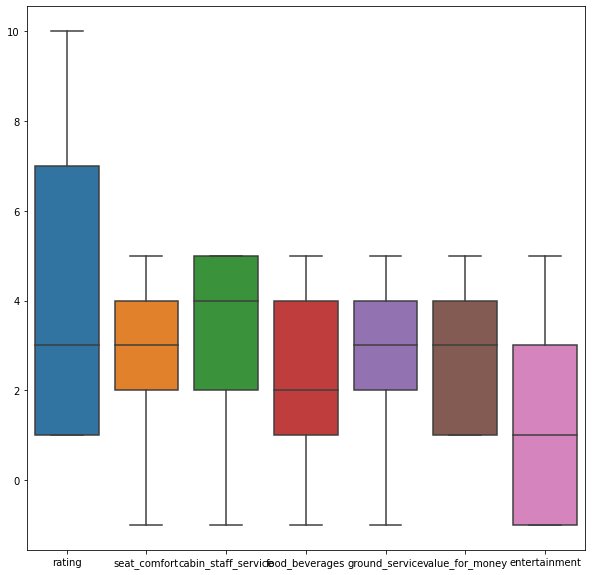

In [11]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df)

In [12]:
pd.pivot_table(data = df, index = 'aircraft', values = ['rating','seat_comfort','cabin_staff_service','food_beverages','ground_service','value_for_money','entertainment'],aggfunc = 'mean').sort_values(by = 'rating',ascending = False).head(10)


cabin_staff_service  entertainment  food_beverages  \
aircraft                                                                    
A321 / Boeing 747-400                  4.0            2.0             4.0   
A320 neo                               4.0           -1.0            -1.0   
E170 / A319                            5.0           -1.0             1.0   
A322                                   3.0           -1.0             1.0   
A380 and Boeing 747                    5.0            4.0             3.0   
Boeing 787-9 / A319                    4.0            2.0             2.0   
Boeing 787-8 / 787-9                   4.0            1.0             2.0   
Boeing 787(9)                          3.0            3.0             3.0   
Boeing 777 / A380                      5.0            5.0             4.0   
A380 and Boeing 777                    5.0           -1.0             5.0   

                       ground_service  rating  seat_comfort  value_for_money  
aircraft                                                                      
A321 / Boeing 747-400             4.0    10.0           4.0              5.0  
A320 neo                          4.0    10.0           4.0              4.0  
E170 / A319                       4.0    10.0           3.0              2.0  
A322                              1.0    10.0           2.0              1.0  
A380 and Boeing 747               5.0    10.0           4.0              5.0  
Boeing 787-9 / A319               4.0    10.0           5.0              3.0  
Boeing 787-8 / 787-9              4.0    10.0           3.0              3.0  
Boeing 787(9)                     1.0    10.0           2.0              1.0  
Boeing 777 / A380                 5.0    10.0           4.0              4.0  
A380 and Boeing 777               5.0    10.0           5.0              5.0

- TOP 10 AIRCRAFTS SORTED BASED ON THE OVERALL RATING AND ALSO THE AIRCRAFT IS DISPLAYED ALONG WITH THEIR RATINGS OF CABIN STAFF SERVICE, ENTERTAINMENT THEY PROVIDE, FOOD BEVERAGES THEY SERVE, GROUNF SERVICE THEY OFFRE, BASED ON THE SEAT COMFORT AND WHETHER THEIR FLIGHT WAS WORTH THE MONEY THEY PAID.

In [13]:
pd.pivot_table(data = df, index = 'aircraft', values = ['rating','seat_comfort','cabin_staff_service','food_beverages','ground_service','value_for_money','entertainment'],aggfunc = 'mean').sort_values(by = 'rating',ascending = False).tail(10)


cabin_staff_service  entertainment  food_beverages  \
aircraft                                                                        
Boeing 777 200/300                         1.0            2.0             1.0   
Boeing 747 and Boeing 777                  5.0            4.0             5.0   
Boeing 777-200 ER                          4.5            2.0             3.5   
Boeing 777-200 and A319                    3.0            4.0             3.0   
Boeing 777-236 ER                          5.0            3.0             5.0   
A321NEO                                    5.0            3.0             4.0   
A321-neo                                   5.0           -1.0             2.0   
Boeing 747 & A319                          4.0            3.0             2.0   
A319 / Boeing 747                          4.0            3.0             4.0   
A320 Finnair                               2.0            1.0             3.0   

                           ground_service  rating  seat_comfort  \
aircraft                                                          
Boeing 777 200/300                    3.0     1.0           2.0   
Boeing 747 and Boeing 777             5.0     1.0           4.0   
Boeing 777-200 ER                     5.0     1.0           2.5   
Boeing 777-200 and A319               3.0     1.0           3.0   
Boeing 777-236 ER                     3.0     1.0           5.0   
A321NEO                               4.0     1.0           4.0   
A321-neo                              1.0     1.0           3.0   
Boeing 747 & A319                     1.0     1.0           2.0   
A319 / Boeing 747                     4.0     1.0           4.0   
A320 Finnair                          1.0     1.0           2.0   

                           value_for_money  
aircraft                                    
Boeing 777 200/300                     2.0  
Boeing 747 and Boeing 777              3.0  
Boeing 777-200 ER                      3.5  
Boeing 777-200 and A319                4.0  
Boeing 777-236 ER                      4.0  
A321NEO                                4.0  
A321-neo                               2.0  
Boeing 747 & A319                      2.0  
A319 / Boeing 747                      5.0  
A320 Finnair                           1.0

- LEAST RATED 10 AIRCRAFTS SORTED BASED ON THE OVERALL RATING AND ALSO THE AIRCRAFT IS DISPLAYED ALONG WITH THEIR RATINGS OF CABIN STAFF SERVICE, ENTERTAINMENT THEY PROVIDE, FOOD BEVERAGES THEY SERVE, GROUNF SERVICE THEY OFFRE, BASED ON THE SEAT COMFORT AND WHETHER THEIR FLIGHT WAS WORTH THE MONEY THEY PAID.

In [14]:
pd.DataFrame(df.groupby(['aircraft','recommended'])['value_for_money'].mean())

value_for_money
aircraft         recommended                 
777              no                       1.0
777-300 and A320 no                       2.0
787              no                       1.0
A19              yes                      4.0
A219             yes                      3.0
...                                       ...
Embraer 190      yes                      3.0
Embraer 195      yes                      3.0
Embraer-190      yes                      5.0
SAAB 2000        yes                      4.0
Various          no                       1.0

[186 rows x 1 columns]

In [15]:
df[df['recommended'] == 'yes'][['aircraft','recommended']]

aircraft recommended
7                     A320         yes
8               Boeing 787         yes
11                    A321         yes
12          Boeing 777-200         yes
18          Boeing 777-300         yes
...                    ...         ...
1317                  A320         yes
1318                  A319         yes
1319            Boeing 787         yes
1320        Boeing 777-200         yes
1322  Boeing 747-400 /A380         yes

[572 rows x 2 columns]

AIRCRAFTS WHICH ARE RECOMMENDED BY THE CUSTOMERS

In [16]:
df[df['recommended'] == 'no'][['aircraft','recommended']]

aircraft recommended
0                 A380          no
1                 A320          no
2                 A320          no
3                 A320          no
4     777-300 and A320          no
...                ...         ...
1310        Boeing 747          no
1311              A320          no
1314        Boeing 737          no
1321    Boeing 747-400          no
1323              A320          no

[751 rows x 2 columns]

AIRCRAFTS WHICH ARE NOT RECOMMENDED BY THE CUSTOMERS

In [17]:
c = df[df['recommended'] == 'yes']['aircraft'].count()
c

572

In [18]:
d = df[df['recommended'] == 'no']['aircraft'].count()
d

751

out of 1324 aircrafts 751 customers have given negative recommendation according to their perspective, 572 customers have recommend to take the flight

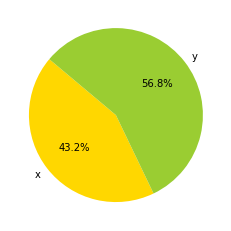

In [19]:
a = [c,d]
labels = 'x','y'
colors = ['gold','yellowgreen']
plt.pie(a,labels = labels,colors = colors, autopct = '%1.1f%%',startangle = 140)
plt.show()

- 56 % of customers do not recommend taking flights.
- 43.2% of customers have recommended to take flights.

In [20]:
pd.set_option('display.max_rows',None)
f = df[df['recommended'] == 'no']['aircraft'].value_counts(ascending = False).head(10)
f

A320              161
Boeing 777        118
A380               61
Boeing 747-400     58
Boeing 747         49
Boeing 777-200     41
A319               39
A321               34
Boeing 787         30
Boeing 767         18
Name: aircraft, dtype: int64

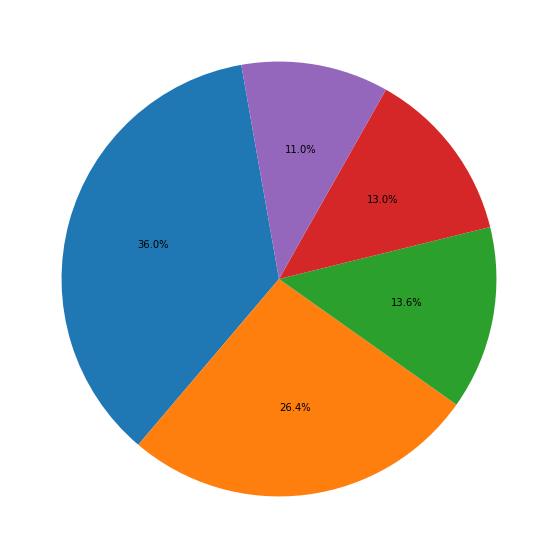

In [21]:
pd.set_option('display.max_rows',None)
plt.figure(figsize = (10,10))
f = df[df['recommended'] == 'no']['aircraft'].value_counts(ascending = False).head(5)
plt.pie(f, autopct = '%1.1f%%',startangle = 100)
plt.show()

HERE COMES TOP 10 NOT RECOMMENDED FIGHTS HERE FLIGHT A320 IS NOT RECOMMENDED BY 161 CUSTOMERS.

In [22]:
pd.set_option('display.max_rows',None)
g = df[df['recommended'] == 'yes']['aircraft'].value_counts(ascending = False).head(10)
g

A320              102
A380               63
Boeing 777         58
Boeing 777-200     39
Boeing 747-400     39
A319               30
A321               29
Boeing 787         25
Boeing 787-9       24
Boeing 747         18
Name: aircraft, dtype: int64

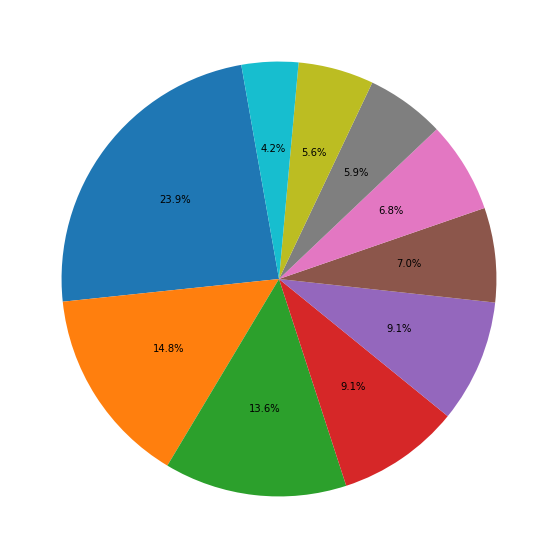

In [23]:
pd.set_option('display.max_rows',None)
g = df[df['recommended'] == 'yes']['aircraft'].value_counts(ascending = False).head(10)
plt.figure(figsize = (10,10))
plt.pie(g, autopct = '%1.1f%%',startangle = 100)
plt.show()

HERE COMES TOP 5 NOT RECOMMENDED FIGHTS HERE FLIGHT A320 IS NOT RECOMMENDED BY 161 CUSTOMERS.

In [24]:
df.groupby(['aircraft'])['value_for_money'].mean().sort_values(ascending = False)

aircraft
B777-300ER / A320 / A380              5.000000
A319 / Boeing 787-9                   5.000000
Boeing 787-9 / A380-800               5.000000
Boeing 777-200/300                    5.000000
Boeing 777 - 200                      5.000000
Boeing 757                            5.000000
Boeing 747-400 / A320                 5.000000
Boeing 747 / A320                     5.000000
B747-400 in retro                     5.000000
B737-400 / A380 / A319                5.000000
A380 and Boeing 747                   5.000000
A340-300, A320                        5.000000
A321 / Boeing 747-400                 5.000000
A380 and Boeing 777                   5.000000
A319 / Boeing 747                     5.000000
A319 / Boeing 747-400                 5.000000
Embraer-190                           5.000000
A380 / Boeing 777                     4.500000
A319 / A380 / Boeing 737              4.000000
A350-1000                             4.000000
Boeing 777-200 / 787-9 / A319/ 320    4.000000
Boei

<Axes: xlabel='trip_verified', ylabel='count'>

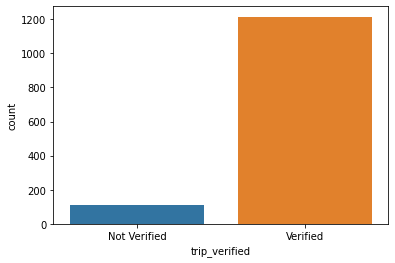

In [25]:
sns.countplot(data = df, x = 'trip_verified')

<Axes: xlabel='recommended', ylabel='count'>

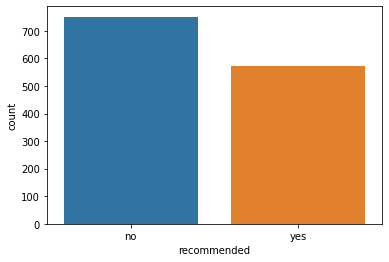

In [26]:
sns.countplot(data = df, x= 'recommended')

In [27]:
df[(df['rating'] == 10) & 
   (df['seat_comfort'] == 5) & 
   (df['cabin_staff_service'] == 5) & 
   (df['food_beverages'] == 5) & 
   (df['ground_service'] == 5) & 
   (df['value_for_money'] == 5) & 
   (df['entertainment'] == 5)][['aircraft','rating','seat_comfort','cabin_staff_service','food_beverages','ground_service','value_for_money','entertainment']]


aircraft  rating  seat_comfort  cabin_staff_service  \
337  Boeing 747-400      10             5                    5   
522            A380      10             5                    5   

     food_beverages  ground_service  value_for_money  entertainment  
337               5               5                5              5  
522               5               5                5              5

BOEING 747 - 400 AND A380 HAVE GOT THE BEST RATING WHILE COMPARED TO OTHERS

In [28]:
df.groupby(['seat_type'])[['rating','seat_comfort','cabin_staff_service','food_beverages','ground_service','value_for_money','entertainment']].mean().sort_values(by = 'rating',ascending = False)

rating  seat_comfort  cabin_staff_service  food_beverages  \
seat_type                                                                      
First Class      4.390805      3.563218             3.862069        3.045977   
Economy Class    4.369818      2.742952             3.112769        1.893864   
Premium Economy  4.219697      3.090909             3.196970        2.522727   
Business Class   3.934132      2.848303             3.407186        2.818363   

                 ground_service  value_for_money  entertainment  
seat_type                                                        
First Class            3.229885         2.965517       2.747126  
Economy Class          2.993367         2.776119       1.106136  
Premium Economy        3.204545         2.787879       2.575758  
Business Class         3.001996         2.748503       1.305389

IN THE WHOLE DATASET OVERALL SEAT TYPE FIRST CLASS IS FAMOUS AMONG THE CUSTOMERS BECAUSE THEIR RATINGS ARE HIGH IN COMPARISSION TO  OTHERS.

In [29]:
df.groupby(['aircraft','seat_type','traveller_type'])[['rating','seat_comfort','cabin_staff_service','food_beverages','ground_service','value_for_money','entertainment']].mean()

rating  \
aircraft                           seat_type       traveller_type              
777                                Economy Class   Couple Leisure   4.500000   
777-300 and A320                   First Class     Couple Leisure   1.000000   
787                                Premium Economy Family Leisure   1.000000   
A19                                Economy Class   Couple Leisure   3.000000   
A219                               Business Class  Couple Leisure   1.000000   
A230                               Premium Economy Solo Leisure     1.000000   
A318                               Economy Class   Solo Leisure     8.000000   
A319                               Business Class  Business         2.125000   
                                                   Couple Leisure   3.000000   
                                                   Family Leisure   5.166667   
                                                   Solo Leisure     2.800000   
                                   Economy Class   Business         4.083333   
                                                   Couple Leisure   4.333333   
                                                   Family Leisure   4.500000   
                                                   Solo Leisure     5.000000   
                                   First Class     Solo Leisure     3.000000   
A319 / A380 / Boeing 737           Premium Economy Couple Leisure   1.000000   
A319 / Boeing 747                  Business Class  Solo Leisure     1.000000   
A319 / Boeing 747-400              First Class     Solo Leisure     1.000000   
A319 / Boeing 777                  Economy Class   Couple Leisure   2.000000   
                                                   Solo Leisure     9.500000   
A319 / Boeing 787-8                Premium Economy Solo Leisure    10.000000   
A319 / Boeing 787-9                Business Class  Family Leisure   7.000000   
A319 / Boeing 789                  Economy Class   Business         5.000000   
A319 / Boeing777                   Business Class  Couple Leisure   5.000000   
A319/320                           Business Class  Couple Leisure   9.000000   
A319/A320                          Economy Class   Business         9.000000   
A320                               Business Class  Business         4.027778   
                                                   Couple Leisure   4.255814   
                                                   Family Leisure   4.125000   
                                                   Solo Leisure     3.423077   
                                   Economy Class   Business         4.580645   
                                                   Couple Leisure   4.225000   
                                                   Family Leisure   4.095238   
                                                   Solo Leisure     4.724138   
A320 / Boeing 747-400              Economy Class   Solo Leisure    10.000000   
A320 / Boeing 767                  Business Class  Business        10.000000   
                                   Economy Class   Business         2.000000   
                                                   Family Leisure   7.000000   
A320 / Boeing 777                  Business Class  Couple Leisure   1.000000   
A320 / Boeing 777-200              Economy Class   Business         4.000000   
A320 / Boeing 787                  Business Class  Business         3.000000   
                                   Economy Class   Couple Leisure   3.000000   
A320 / Boeing 787-9                Economy Class   Couple Leisure   4.000000   
A320 A350                          Business Class  Family Leisure   1.000000   
A320 Finnair                       Business Class  Business         1.000000   
A320 Neo                           Business Class  Couple Leisure   3.500000   
A320 neo                           Economy Class   Business        10.000000   
A320, A380                         Business Class  Family Leisure   1.

THIS SHOWS THE OVERALL COMPARISSION AMONG EACH AIRCRAFT IN AVERAGE.

<Axes: >

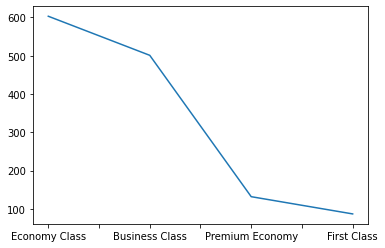

In [47]:
df['seat_type'].value_counts().plot(kind = 'line')


IN THE WHOLE DATASET THE COUNT OF SEATS BOOKED FOR ECONOMY CLASS IS MORE IN COMPARISSION TO OTHERS.

In [31]:
pd.crosstab(index = df['aircraft'],columns = df['seat_type'])

seat_type                           Business Class  Economy Class  \
aircraft                                                            
777                                              0              2   
777-300 and A320                                 0              0   
787                                              0              0   
A19                                              0              1   
A219                                             1              0   
A230                                             0              0   
A318                                             0              1   
A319                                            31             37   
A319 / A380 / Boeing 737                         0              0   
A319 / Boeing 747                                1              0   
A319 / Boeing 747-400                            0              0   
A319 / Boeing 777                                0              3   
A319 / Boeing 787-8                              0              0   
A319 / Boeing 787-9                              1              0   
A319 / Boeing 789                                0              1   
A319 / Boeing777                                 1              0   
A319/320                                         1              0   
A319/A320                                        0              1   
A320                                           113            150   
A320 / Boeing 747-400                            0              1   
A320 / Boeing 767                                1              2   
A320 / Boeing 777                                1              0   
A320 / Boeing 777-200                            0              1   
A320 / Boeing 787                                1              1   
A320 / Boeing 787-9                              0              1   
A320 A350                                        1              0   
A320 Finnair                                     1              0   
A320 Neo                                         2              0   
A320 neo                                         0              1   
A320, A380                                       1              0   
A320, Boeing 787                                 0              0   
A320-200                                         4              3   
A320-233                                         0              1   
A320/319                                         0              1   
A320/A319                                        0              1   
A320/B788                                        0              1   
A320NEO                                          0              1   
A320Neo                                          0              1   
A320neo                                          4              1   
A321                                            22             41   
A321 / Boeing 747-400                            0              1   
A321 / Boeing 777                                1              1   
A321 / Boeing 777-300                            0              1   
A321 / Boeing 787-9                              0              1   
A321 Neo                                         1              2   
A321 neo                                         3              0   
A321-200                                         0              2   
A321-neo                                         1              0   
A321NEO                                          0              1   
A321Neo                                          0              2   
A321neo                                          3              7   
A322                                             0              1   
A330                                             1              0   
A340-300                                         0              1   
A340-300, A320                                   1              0   
A350                                             7              4  

THIS SHOWS THE AIRCRAFT WISE  NO OF SEATS BOOKED.

In [32]:
pd.set_option('display.max_rows',None)
g = df[df['recommended'] == 'yes'][['aircraft','seat_type']].value_counts(ascending = False).head(10)
g

aircraft        seat_type     
A320            Business Class    52
                Economy Class     50
A380            Economy Class     24
Boeing 777      Business Class    21
A380            Business Class    21
A321            Economy Class     19
Boeing 777-200  Business Class    19
Boeing 747-400  Economy Class     18
Boeing 777      Economy Class     18
A319            Economy Class     17
dtype: int64

THIS SHOWS THE TOP 10 RECOMMENDED AIRCRAFTS ALONG WITH WHICH SEAT TYPE CUSTOMER HAS CHOSE. IN THE A320 AIRCRAFT MOST OF THE TICKETS ARE BOOKED OF BUISNESS CLASS.

In [33]:
pd.set_option('display.max_rows',None)
g = df[df['recommended'] == 'yes'][['aircraft','traveller_type']].value_counts(ascending = False).head(10)
g

aircraft        traveller_type
A320            Solo Leisure      36
                Couple Leisure    34
A380            Solo Leisure      26
Boeing 777      Couple Leisure    26
                Solo Leisure      23
A320            Business          20
A380            Couple Leisure    18
Boeing 777-200  Couple Leisure    15
Boeing 747-400  Couple Leisure    15
                Solo Leisure      15
dtype: int64

THIS SHOWS THE TOP 10 RECOMMENDED AIRCRAFTS ALONG WITH WHICH TRAVELLER TYPE CUSTOMER HAS CHOSE. IN THE A320 AIRCRAFT MOST OF THE TICKETS ARE BOOKED OF SOLO LEISURE.

In [34]:
pd.set_option('display.max_rows',None)
g = df[df['recommended'] == 'yes'][['aircraft','seat_type','traveller_type']].value_counts(ascending = False).head(10)
g

aircraft        seat_type        traveller_type
A320            Economy Class    Solo Leisure      20
                Business Class   Couple Leisure    20
                                 Solo Leisure      16
                Economy Class    Couple Leisure    14
A380            Economy Class    Solo Leisure      13
Boeing 777      Business Class   Couple Leisure    12
A320            Business Class   Business          11
Boeing 777      Premium Economy  Solo Leisure      10
Boeing 777-200  Business Class   Couple Leisure     9
Boeing 777      Economy Class    Couple Leisure     9
dtype: int64

THIS SHOWS IN THE TOP 10 RECOMMENDED AIRCRAFTS WHICH SEAT TYPE AND TRAVELLER TYPE HAS BEEN BOOKED THE MOST.

<Axes: xlabel='trip_verified', ylabel='rating'>

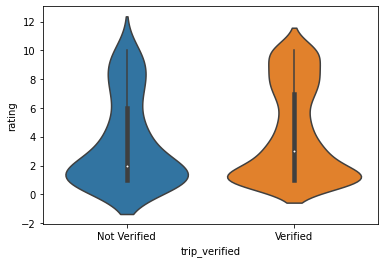

In [49]:
sns.violinplot(data = df, x = 'trip_verified',y = 'rating')

MOST OF THE CUSTOMRES WHOSE TRIP ARE NOT VERIFIED HAVE GIVEN RATING BELOW 0.

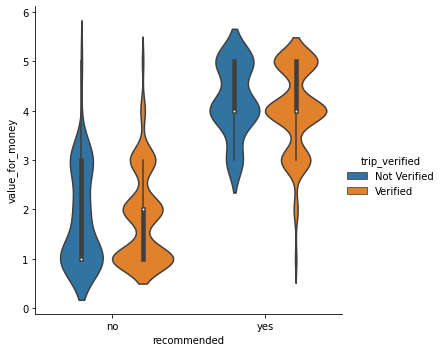

In [52]:
sns.catplot(data = df, x = 'recommended',y = 'value_for_money',hue = 'trip_verified', kind = 'violin')

- customers who do not recommend taking the certain flights have given the rating above 0 for whether the flight is worth taking.
